# Deep Learning Models

In [114]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import matplotlib.pyplot as plt

In [115]:
Final_df = pd.read_csv('./Clean_dataframe/clean_df.csv')

In [116]:
Final_df.columns

Index(['Unnamed: 0', 'time_decimal', 'value', 'value_std_dev', 'nvalue',
       'latitude', 'longitude', 'altitude', 'elevation', 'intake_height',
       'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'ACMH', 'ACSH', 'AWND',
       'DAPR', 'DASF', 'FMTM', 'MDPR', 'MDSF', 'PGTM', 'PRCP', 'PSUN', 'SNOW',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TOBS', 'TSUN', 'WDF1', 'WDF2', 'WDF5',
       'WDFG', 'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WT01', 'WT02', 'WT03',
       'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11', 'WT13',
       'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22', 'WV01',
       'WV03', 'WV07', 'WV18', 'WV20', 'year_month_day', 'sea_level'],
      dtype='object')

In [117]:
features = ['LONGITUDE', 'ELEVATION','TMIN', 'TMAX' ,'PRCP','TAVG']
X = Final_df[features]
y = Final_df['sea_level']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [118]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [119]:
# construct network
model = Sequential()

# first layer
model.add(Dense(32, input_shape=(6,), activation='relu'))

# second layer
model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(1))

In [120]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [121]:
model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size=512);

Epoch 1/10
139/139 [==============================] - 0s 1ms/step - loss: 7942728.5000 - mae: 2630.4641 - val_loss: 7867356.0000 - val_mae: 2614.7195
Epoch 2/10
139/139 [==============================] - 0s 846us/step - loss: 7529960.0000 - mae: 2552.7847 - val_loss: 7039824.5000 - val_mae: 2457.9253
Epoch 3/10
139/139 [==============================] - 0s 833us/step - loss: 6159285.5000 - mae: 2281.6409 - val_loss: 5136858.0000 - val_mae: 2062.8145
Epoch 4/10
139/139 [==============================] - 0s 833us/step - loss: 4026484.0000 - mae: 1792.9374 - val_loss: 3006754.7500 - val_mae: 1520.6827
Epoch 5/10
139/139 [==============================] - 0s 824us/step - loss: 2299107.0000 - mae: 1289.5122 - val_loss: 1787657.8750 - val_mae: 1098.4799
Epoch 6/10
139/139 [==============================] - 0s 814us/step - loss: 1482305.3750 - mae: 966.6536 - val_loss: 1276925.8750 - val_mae: 867.5413
Epoch 7/10
139/139 [==============================] - 0s 825us/step - loss: 1099574.2500 - m

In [122]:
test_preds = model.predict(X_test_sc)

In [123]:
print(f'RMSE on base neural network model: {mean_squared_error(y_test, test_preds, squared = False)}')

RMSE on base neural network model: 771.5795010341686


In [124]:
model.evaluate(X_test_sc, y_test, batch_size=512)

47/47 [==============================] - 0s 478us/step - loss: 595335.0000 - mae: 527.0966


[595335.0, 527.0966186523438]

## GridSearch

In [127]:
def model_fn_adv(hidden_neurons = 32, hidden_layers = 5, dropout = 0.5):
    # build framework of model using for loop and if statement
    model = Sequential()
    
    # adding number of layers = specified in calling of function
    for layer in range(hidden_layers):
        if layer == 0:
            model.add(Dense(hidden_neurons, activation = 'relu', input_shape = (6,)))
            model.add(Dropout(dropout))
        else:
            model.add(Dense(hidden_neurons, activation = 'relu'))
            model.add(Dropout(dropout))
    
    # out put layer added here, Identity link function used as 'None'
    model.add(Dense(1, activation = None))

    # using mse as the metric to solve for 
    model.compile(loss = 'mse', optimizer = 'adam')
    
    return model

In [128]:
nn = KerasRegressor(build_fn = model_fn_adv, batch_size = 512, verbose = 0)

In [129]:
nn_params_deep = {
    'hidden_neurons' : [20, 32, 64],
    'hidden_layers'  : [2, 3, 5],
    'dropout'        : [0.1, 0.2, 0.3, 0.4, 0.5],
    'epochs'         : [10, 20, 30, 40, 50]
}

In [132]:
gs = GridSearchCV(nn, param_grid = nn_params_deep, cv = 5, verbose = 1)

In [133]:
gs.fit(X_train_sc, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001E42AC0FB20>,
             param_grid={'dropout': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'epochs': [10, 20, 30, 40, 50],
                         'hidden_layers': [2, 3, 5],
                         'hidden_neurons': [20, 32, 64]},
             verbose=1)

In [134]:
gs.best_params_

{'dropout': 0.1, 'epochs': 30, 'hidden_layers': 5, 'hidden_neurons': 64}

In [135]:
gs.best_score_

-42812.85859375

In [136]:
# Make predictions 
preds = gs.predict(X_test_sc)

In [137]:
# Check the R-squared
metrics.r2_score(y_test, preds)

0.9281423319609716

In [139]:
# Checking RMSE score
mean_squared_error(y_test, preds, squared = False)

272.1333481297308

## Recurrent Neural Networks

In [140]:
features = ['LONGITUDE', 'ELEVATION','TMIN', 'TMAX' ,'PRCP','TAVG']
X = Final_df[features]
y = Final_df[['sea_level']].values

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, shuffle = False)

In [141]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [142]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length=40, batch_size=64)

In [143]:
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=40, batch_size=64)

In [144]:
test_sequences[0][0].shape

(64, 40, 6)

In [145]:
train_sequences[0][0].shape

(64, 40, 6)

In [146]:
input_shape = train_sequences[0][0][0].shape

In [155]:
model = Sequential()
model.add(GRU(8, input_shape=input_shape, return_sequences=True)) # True if next layer is RNN
model.add(GRU(8, return_sequences=False)) # False if next layer is Dense

model.add(Dense(4, activation='relu'))

model.add(Dense(1))

In [156]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_sequences, validation_data=test_sequences, epochs=50, verbose=1)

Epoch 1/50
1109/1109 [==============================] - 25s 21ms/step - loss: 8001168.5000 - mae: 2646.0110 - val_loss: 6741946.0000 - val_mae: 2381.3672
Epoch 2/50
1109/1109 [==============================] - 23s 20ms/step - loss: 7160337.0000 - mae: 2481.3450 - val_loss: 5746738.0000 - val_mae: 2162.5745
Epoch 3/50
1109/1109 [==============================] - 23s 20ms/step - loss: 5928179.0000 - mae: 2218.4875 - val_loss: 4532595.5000 - val_mae: 1861.8549
Epoch 4/50
1109/1109 [==============================] - 23s 20ms/step - loss: 4566750.0000 - mae: 1887.9540 - val_loss: 3323899.7500 - val_mae: 1507.1453
Epoch 5/50
1109/1109 [==============================] - 23s 20ms/step - loss: 3280872.0000 - mae: 1518.8245 - val_loss: 2290927.5000 - val_mae: 1146.7246
Epoch 6/50
1109/1109 [==============================] - 23s 20ms/step - loss: 2229614.7500 - mae: 1191.8303 - val_loss: 1560853.2500 - val_mae: 920.3450
Epoch 7/50
1109/1109 [==============================] - 23s 20ms/step - loss:

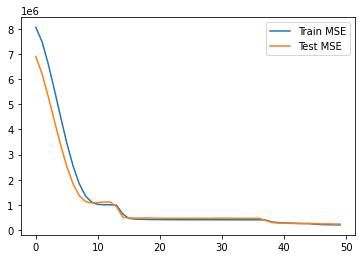

In [151]:
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Test MSE')
plt.legend();

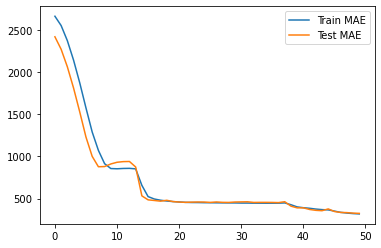

In [152]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Test MAE')
plt.legend();

In [157]:
# Add early stopping
from tensorflow.keras.callbacks import EarlyStopping

model2 = Sequential()
model2.add(GRU(8, input_shape=input_shape, return_sequences=True)) # True if next layer is RNN
model2.add(GRU(8, return_sequences=False)) # False if next layer is Dense

model2.add(Dense(4, activation='relu'))

model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

es = EarlyStopping(patience = 5)

history2 = model2.fit(train_sequences, validation_data=test_sequences, epochs=100, batch_size = 64, callbacks = [es])

Epoch 1/100
1109/1109 [==============================] - 25s 20ms/step - loss: 8165819.5000 - mae: 2677.0322 - val_loss: 7102899.0000 - val_mae: 2455.9678
Epoch 2/100
1109/1109 [==============================] - 22s 20ms/step - loss: 7882709.5000 - mae: 2623.5376 - val_loss: 6748046.0000 - val_mae: 2382.6484
Epoch 3/100
1109/1109 [==============================] - 22s 20ms/step - loss: 7420130.5000 - mae: 2533.7458 - val_loss: 6258915.5000 - val_mae: 2277.7759
Epoch 4/100
1109/1109 [==============================] - 22s 20ms/step - loss: 6835987.5000 - mae: 2415.5471 - val_loss: 5680920.5000 - val_mae: 2147.3313
Epoch 5/100
1109/1109 [==============================] - 22s 20ms/step - loss: 6169835.0000 - mae: 2273.6130 - val_loss: 5046159.0000 - val_mae: 1994.4614
Epoch 6/100
1109/1109 [==============================] - 22s 20ms/step - loss: 5451994.5000 - mae: 2110.5571 - val_loss: 4382141.0000 - val_mae: 1821.2520
Epoch 7/100
1109/1109 [==============================] - 22s 20ms/step

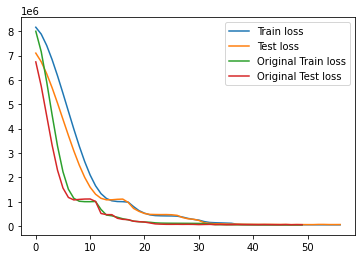

In [161]:
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Test loss')
plt.plot(history.history['loss'], label='Original Train loss')
plt.plot(history.history['val_loss'], label='Original Test loss')
plt.legend();